In [1]:
#Fuctional network

In [9]:
pip install pydot

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'C:\Users\JaFsi\anaconda3\python.exe -m pip install --upgrade pip' command.


In [14]:
#pip install pydotplus

In [21]:
#pip install graphviz

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'C:\Users\JaFsi\anaconda3\python.exe -m pip install --upgrade pip' command.


In [11]:
import os
os.environ["PATH"] += os.pathsep + 'C:/Program Files/Graphviz/bin/'#C:\Program Files\Graphviz\bin

In [12]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [13]:
inputs = keras.Input(shape=(32, 32, 3), name="img")
x = layers.Conv2D(32, 3, activation="relu")(inputs)
x = layers.Conv2D(64, 3, activation="relu")(x)
block_1_output = layers.MaxPooling2D(3)(x)

x = layers.Conv2D(64, 3, activation="relu", padding="same")(block_1_output)
x = layers.Conv2D(64, 3, activation="relu", padding="same")(x)
block_2_output = layers.add([x, block_1_output])

x = layers.Conv2D(64, 3, activation="relu", padding="same")(block_2_output)
x = layers.Conv2D(64, 3, activation="relu", padding="same")(x)
block_3_output = layers.add([x, block_2_output])

x = layers.Conv2D(64, 3, activation="relu")(block_3_output)
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dense(256, activation="relu")(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(10)(x)

model = keras.Model(inputs, outputs, name="toy_resnet")
model.summary()

Model: "toy_resnet"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
img (InputLayer)                [(None, 32, 32, 3)]  0                                            
__________________________________________________________________________________________________
conv2d_14 (Conv2D)              (None, 30, 30, 32)   896         img[0][0]                        
__________________________________________________________________________________________________
conv2d_15 (Conv2D)              (None, 28, 28, 64)   18496       conv2d_14[0][0]                  
__________________________________________________________________________________________________
max_pooling2d_2 (MaxPooling2D)  (None, 9, 9, 64)     0           conv2d_15[0][0]                  
_________________________________________________________________________________________

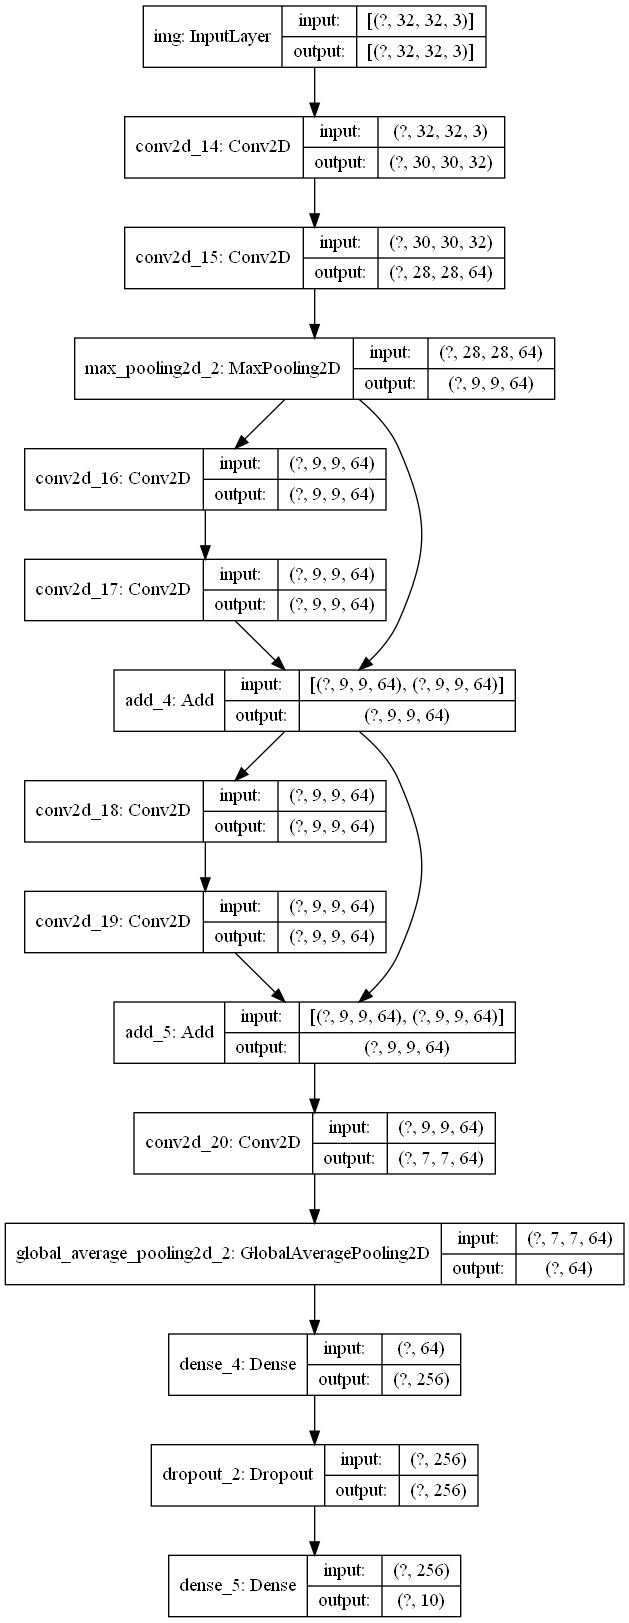

In [14]:
keras.utils.plot_model(model, "mini_resnet.png", show_shapes=True)

In [15]:
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()

x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

model.compile(
    optimizer=keras.optimizers.RMSprop(1e-3),
    loss=keras.losses.CategoricalCrossentropy(from_logits=True),
    metrics=["acc"],
)


In [16]:
model.fit(x_train[:1000], y_train[:1000], batch_size=64, epochs=15, validation_split=0.2)
model.evaluate(x_test,y_test)

Epoch 1/15
13/13 [==============================] - 4s 299ms/step - loss: 2.3074 - acc: 0.0950 - val_loss: 2.2959 - val_acc: 0.1300
Epoch 2/15
13/13 [==============================] - 3s 263ms/step - loss: 2.2824 - acc: 0.1187 - val_loss: 2.2759 - val_acc: 0.1650
Epoch 3/15
13/13 [==============================] - 3s 263ms/step - loss: 2.2596 - acc: 0.1625 - val_loss: 2.2266 - val_acc: 0.2000
Epoch 4/15
13/13 [==============================] - 3s 257ms/step - loss: 2.2083 - acc: 0.1787 - val_loss: 2.2424 - val_acc: 0.1500
Epoch 5/15
13/13 [==============================] - 3s 257ms/step - loss: 2.1696 - acc: 0.1675 - val_loss: 2.1260 - val_acc: 0.2200
Epoch 6/15
13/13 [==============================] - 3s 256ms/step - loss: 2.1250 - acc: 0.1887 - val_loss: 2.0982 - val_acc: 0.1900
Epoch 7/15
13/13 [==============================] - 3s 256ms/step - loss: 2.1252 - acc: 0.2062 - val_loss: 2.1084 - val_acc: 0.1900
Epoch 8/15
13/13 [==============================] - 3s 258ms/step - loss: 2.

[1.9634838104248047, 0.25130000710487366]